# Calibration Plotting


May 17th, 2024
Neerja Aggarwal
Plot the spectral calibration data nicely

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import torch
import torchvision
import os
import sys
sys.path.append("../") # needed to bring in sdc module
import sdc_config5 as sdc
import sdc_config3 as sdc_np

import jax.numpy as jnp
import jax
# figures helper functions
%run figures_util.py
# from cleanplots import *

# CHOOSE GPU
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append('../')
gpu = 3

# ACTION: CHOOSE WHICH GPU TO USE (0-3)
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_LAUNCH_BLOCKING'] = str(1) # get more error messages
# ACTION: CHOOSE WHICH GPU TO USE (0-3)
os.environ['CUDA_VISIBLE_DEVICES'] = str(gpu)
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false' #stop jax from preallocating 75% of the gpu

In [2]:
# Load and crop filter cube
calibration_location = '../'
psf_name = 'recon_materials_organized/psf_2023-11-16.pt'
filter_cube_file = 'Calibration_data/spectral_calibration_2024-02-28_2nmFWHM_400to720every2nm.pt'  # 'filter_stack' # use new one from 2024
spectral_filter_data = torch.load(os.path.join(calibration_location,filter_cube_file),map_location='cpu')
wavelength = spectral_filter_data['wavelength']
filter_stack = spectral_filter_data['filter_stack']

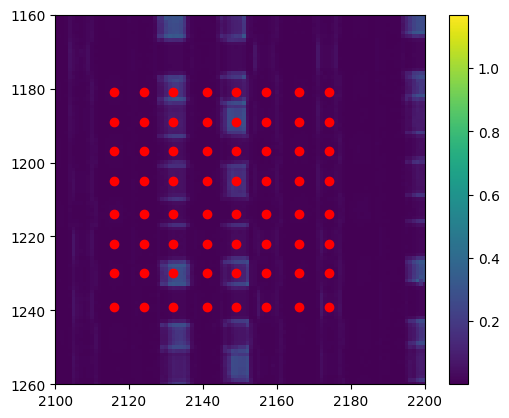

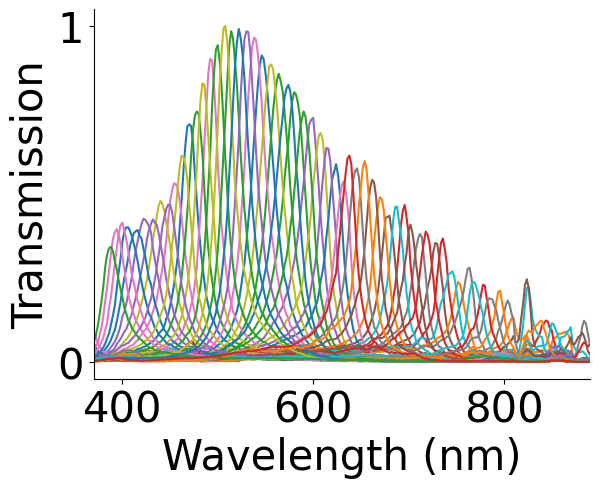

In [3]:
idy,idx= [1181,2116]
pixsize = 2.4 # micron
filtersize = 20 # micron
stride = filtersize/pixsize
yval = np.floor(np.arange(idy,idy+stride*8, stride))[0:8].astype('int')
xval = np.floor(np.arange(idx,idx+stride*8, stride))[0:8].astype('int')
x,y = np.meshgrid(xval,yval)
plt.scatter(x,y, c = 'red')
plt.imshow(filter_stack[100,:,:])
plt.colorbar()
plt.xlim(2100,2200)
plt.ylim(1260,1160)

filter_transmission = filter_stack[:,y,x].reshape(len(wavelength),len(y)*len(x))
# make into pretty transmission plot. 
filter_transmission = filter_transmission/torch.max(filter_transmission)
plt.figure()
plt.plot(wavelength,filter_transmission)

plt.xlabel('Wavelength (nm)',  fontsize=30)
plt.ylabel('Transmission',  fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# Turn off the box
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim([370,890])

# Set the x-axis tick locations
plt.gca().set_xticks([400,600,800])
plt.gca().set_yticks([0,1])

In [27]:
# make into rainbow.
# sort into ascending peaks

from scipy.signal import find_peaks
peak_list = []
# Find the peaks in the filter_transmission data
for k in range(filter_transmission.shape[1]):
    peaks, _ = find_peaks(filter_transmission[:,k], prominence=0.05)
    if len(peaks)==0:
        print(k)
    if len(peaks)>1:
        print(k)
    peak_list.append(peaks[0])
# sort into ascending peaks
sort_idx = np.squeeze(np.argsort([peak_list]))
print(sort_idx)
filter_transmission_sorted = filter_transmission[:,sort_idx]



[62 46 56 40 30 14 24  8 54  6 48  0 33 22 38 16 32 58 42 60 44 26 10 28
 12 50  2 52  4 18 34 20 36 63 47 61 45 31 15 29 13 55  7 53  5 23 39 21
 37 59 43 57 41 27 11 25  9 51  3 49  1 19 35 17]


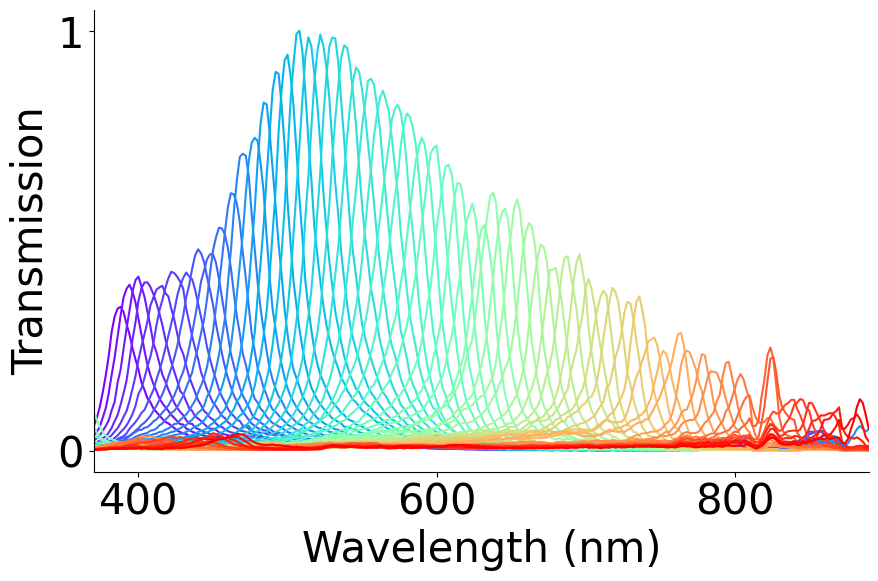

In [28]:

# Create a colormap with rainbow colors
cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, filter_transmission.shape[1]))

# Plot the data
plt.figure(figsize=(10, 6))

for i in range(filter_transmission.shape[1]):
    plt.plot(wavelength,filter_transmission_sorted[:,i], color=colors[i,:])

plt.xlabel('Wavelength (nm)',  fontsize=30)
plt.ylabel('Transmission',  fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# Turn off the box
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim([370,890])

# Set the x-axis tick locations
plt.gca().set_xticks([400,600,800])
plt.gca().set_yticks([0,1])

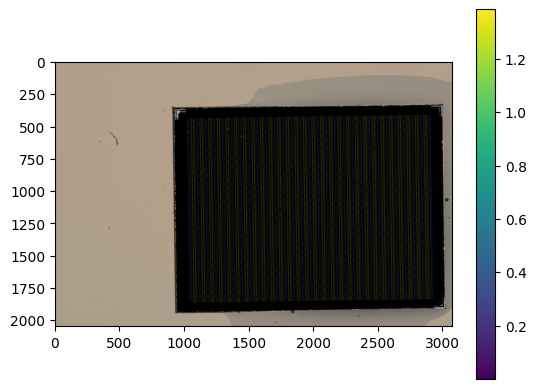

In [35]:
plt.imshow(filter_stack[0,:,:])
plt.colorbar()

HSI_data = np.transpose(filter_stack, (1,2,0))
HSI_data = np.reshape(HSI_data, [-1,filter_stack.shape[0]])
false_color = sdc_np.HSI2RGB(wavelength, HSI_data ,filter_stack.shape[1],filter_stack.shape[2], 65, False)
plt.imshow(false_color)


(-0.5, 65.5, 65.5, -0.5)

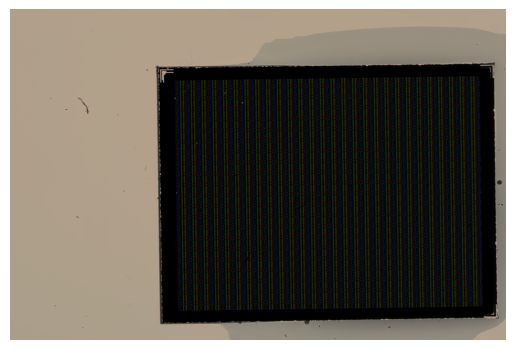

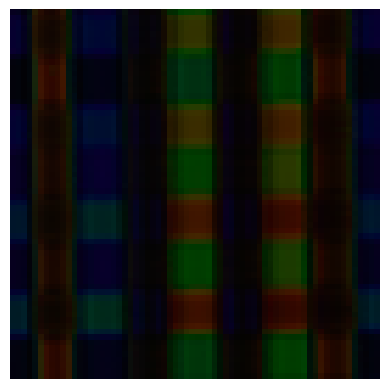

In [54]:
plt.figure()
plt.imshow(false_color)
plt.axis('off')
plt.figure()
plt.imshow(false_color[1160:1160+66,2100:2100+66,:])
plt.axis('off')
